# L2编程作业
## 1. 编写PLA算法与Pocket算法
### 1.1 PLA算法的编程实现

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义PLA算法函数
def PLA(X, y,max_iter=1000):
    # 对输入样本进行增广，增加一列1作为每个输入样本的X的x0
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, values=X_1, axis=1)
    # 初始化权重向量为[0,0,0]
    w = np.zeros(X.shape[1])
    b = 0
    while max_iter > 0:
        # 初始化分类错误标志变量
        error = False
        # 遍历所有样本点
        for i in range(X.shape[0]):
            # 如果样本点被错误分类
            if y[i] * (np.dot(X[i], w)+b) <= 0:
                # 更新权重向量
                w = w + y[i] * X[i]
                b = b + y[i]
                error = True
        # 如果所有样本点都被正确分类，则停止迭代
        if not error:
            break
        max_iter -= 1
    return w,b

上述代码是PLA算法的基本实现过程，大致流程与思路如下所示：
- 第一步，导入所需要使用的库，包括`numpy`、`matplotlib`。
- 第二步，我们需要对输入样本进行增广化，采用令${x_0}=1$的思路，将原始的二维数据转化为三维数据，为后续计算做准备。X.shape[0]是指X的行数，即样本的数量，np.ones()可以生成全1数组${X_1}$,再将${X_1}$插入X的第一列，即可得到增广矩阵X。该部分通过下面代码实现：
```python  
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, values=X_1, axis=1)
```
- 第三步，我们需要初始化权向量$w$与偏置项$b$,这里我们采用全0初始化的方式，即令$w$与$b$均为0。相应的，w也需要进行增广化，令${w_0}$=0，即可得到增广权向量w。该部分通过下面代码实现：
```python
    w = np.zeros(X.shape[1])
    b = 0
```
- 第四步，开始循环迭代，直到所有样本都被正确分类。设置分类错误标志变量error并在每次循环开始时设置为False。在每次迭代中，我们需要对所有样本进行遍历，对于每个样本，如果该样本被正确分类，则不做任何操作，如果该样本被错误分类，则更新权向量$w$与偏置项$b$。更新的公式为：$$ {w_{t + 1}} = {w_t} + {y_n}{x_n}(t) $$ $$ {b_{t + 1}} = {b_t} + {y_n} $$ 与此同时，设置错误分类标志变量为error=True.当所有样本都经过一次遍历而error仍然为FLase时，利用判断语句跳出循环。该部分通过下面代码实现：
```python
    while True:
        error = False
        for i in range(X.shape[0]):
            if y[i] * (np.dot(X[i], w)+b) <= 0:
                w = w + y[i] * X[i]
                b = b + y[i]
                error = True
        if not error:
            break
```
- 最后，得到返回值，即权向量$w$与偏置项$b$。该部分通过下面代码实现：
```python
    return w, b
```

下面给出8个+1样本和8个-1样本验证上述算法的正确性。

In [361]:
X = np.array([[4,0.75],[4,0.5],[2, 1], [3, 1.75],[3.5,1],[3,1.5],[4,1], [2.5,1],[4, 3], [1, 3],[1, 2.5],[2, 2.5],[1.5,3],[1.5,2.5],[2,1.5],[1,2]])
y = np.array([1,1,1, 1, 1, 1,1, 1,-1, -1,-1, -1,-1, -1,-1,-1])
# 调用PLA算法进行训练
w,b = PLA(X, y)
# 打印最终的权重向量和偏置项
print("最终的权重向量：", w)
print("最终的偏置项：", b)

最终的权重向量： [ 2.   5.  -9.5]
最终的偏置项： 2


[[  6.75    6.8     6.85  ...  31.6    31.65   31.7  ]
 [  6.655   6.705   6.755 ...  31.505  31.555  31.605]
 [  6.56    6.61    6.66  ...  31.41   31.46   31.51 ]
 ...
 [-35.715 -35.665 -35.615 ... -10.865 -10.815 -10.765]
 [-35.81  -35.76  -35.71  ... -10.96  -10.91  -10.86 ]
 [-35.905 -35.855 -35.805 ... -11.055 -11.005 -10.955]]


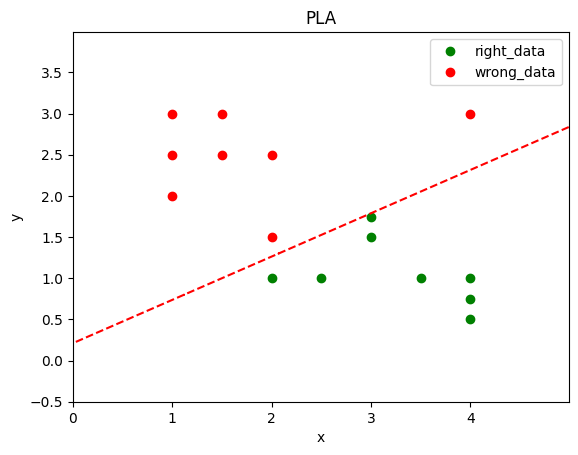

In [362]:
X = np.array([[4,0.75],[4,0.5],[2, 1], [3, 1.75],[3.5,1],[3,1.5],[4,1], [2.5,1],[4, 3], [1, 3],[1, 2.5],[2, 2.5],[1.5,3],[1.5,2.5],[2,1.5],[1,2]])
A_V = np.vsplit(X,2)
A_U = A_V[0]
A_V = A_V[1]
A_Y = np.hsplit(A_U,2)
AY0 = np.ravel(A_Y[0])
AY1 = np.ravel(A_Y[1])
A_N = np.hsplit(A_V,2)
AN0 = np.ravel(A_N[0])
AN1 = np.ravel(A_N[1])
plt.plot(AY0, AY1,'o',label='right_data',color='green')
plt.plot(AN0, AN1,'o',label='wrong_data',color='red')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
zz = w[1] * xx + w[2] * yy + b
print(zz)
plt.contour(xx, yy, zz, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.legend()
plt.show()

可以发现，总的来说效果还不错

### Pocket算法的编程实现

In [363]:
import numpy as np

# 定义Pocket算法函数
def Pocket(X, y,max_times=1000):
    # 对输入样本进行增广，增加一列1作为每个输入样本的X的x0
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, values=X_1, axis=1)
    # 初始化权重向量为[0,0,0]
    w = np.zeros(X.shape[1])  # 初始化权重向量
    w_pocket = np.copy(w)     # 初始化Pocket中的权重向量,直接选择w_pocket = (0,0,0)
    b = 0                     # 初始化偏置项
    b_pocket = 0             # 初始化Pocket中的偏置项
    min_error = 0             # 初始化最小错误数，即初始Pocket中的错误数
    for i in range(X.shape[0]):
        if y[i] * (np.dot(X[i], w_pocket) + b_pocket) <= 0:
            min_error += 1
    times = 0
    while times < max_times and min_error > 0:
        error = 0  # 统计当前迭代的分类错误数
        # 随机打乱样本顺序
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in indices:
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                w = w + y[i] * X[i]
                b = b + y[i]
        for i in range(X.shape[0]):
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                error += 1

        # 如果当前迭代的错误数更少，则更新Pocket中的权重和偏置项
        if error < min_error:
            min_error = error
            w_pocket = np.copy(w)
            b_pocket = b
            times += 1
        else:
            times += 1
            continue
    #返回Pocket中的权重、偏置项和最小错误数
    return w_pocket, b_pocket, min_error 


上述代码是Pocket算法的基本实现过程，大致流程与思路如下所示：
- 第一步，导入所需要使用的库，包括`numpy`、`matplotlib`。
- 第二步，我们需要对输入样本进行增广化，采用令${x_0}=1$的思路，将原始的二维数据转化为三维数据，为后续计算做准备。X.shape[0]是指X的行数，即样本的数量，np.ones()可以生成全1数组${X_1}$,再将${X_1}$插入X的第一列，即可得到增广矩阵X。该部分通过下面代码实现：
```python  
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, values=X_1, axis=1)
```
- 第三步，我们需要初始化权向量$w$与偏置项$b$,同时任意取初始化Pocket向量与偏置量，并计算在此权向量下的错分数作为初始最小错分数min_error。这里我们采用全0初始化的方式，即令$w$与$b$均为0。相应的，w也需要进行增广化，令${w_0}$=0，即可得到增广权向量w。该部分通过下面代码实现：
```python
    w = np.zeros(X.shape[1])  # 初始化权重向量
    w_pocket = np.copy(w)     # 初始化Pocket中的权重向量,直接选择w_pocket = (0,0,0)
    b = 0                     # 初始化偏置项
    b_pocket = 0             # 初始化Pocket中的偏置项
    min_error = 0             # 初始化最小错误数，即初始Pocket中的错误数
    for i in range(X.shape[0]):
        if y[i] * (np.dot(X[i], w_pocket) + b_pocket) <= 0:
            min_error += 1
```
- 第四步，开始循环迭代，直到所有样本都被正确分类或达到最大迭代次数。设置分类错误计数变量error并在每次循环开始时清零。在每次迭代中，我们需要对所有样本进行遍历，如果样本被错误分类的数量小于现有的min_error，则更新权向量$w$与偏置项$b$作为新的w_pocket与b_pocket。更新的公式为：$$ {w_{t + 1}} = {w_t} + {y_n}{x_n}(t) $$,$$ {b_{t + 1}} = {b_t} + {y_n} $$ 。当所有样本都正确分类或达到最大迭代次数时，停止循环。该部分通过下面代码实现：
```python
    times = 0
    while times < max_times and min_error > 0:
        error = 0  # 统计当前迭代的分类错误数

        for i in range(X.shape[0]):
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                w = w + y[i] * X[i]
                b = b + y[i]
                error += 1

        # 如果当前迭代的错误数更少，则更新Pocket中的权重和偏置项
        if error < min_error:
            min_error = error
            w_pocket = np.copy(w)
            b_pocket = b
```
- 最后，得到返回值，即权向量$w$，偏置项$b$与最小错分数。该部分通过下面代码实现：
```python
    return w_pocket, b_pocket, min_error 
```

下面给出与PLA算法例中相同的样本输入测试代码

In [364]:
X = np.array([[4,0.75],[4,0.5],[2, 1], [3, 1.75],[3.5,1],[3,1.5],[4,1], [2.5,1],[4, 3], [1, 3],[1, 2.5],[2, 2.5],[1.5,3],[1.5,2.5],[2,1.5],[1,2]])
y = np.array([1,1,1, 1, 1, 1,1, 1,-1, -1,-1, -1,-1, -1,-1,-1])

# 调用Pocket算法进行训练
w_pocket, b_pocket,min = Pocket(X, y)

# 打印Pocket算法找到的最佳权重向量和偏置项
print(min)
print(w_pocket)
print( b_pocket)


0
[ 0.    4.   -5.75]
0


[[  2.875    2.915    2.955  ...  22.755   22.795   22.835 ]
 [  2.8175   2.8575   2.8975 ...  22.6975  22.7375  22.7775]
 [  2.76     2.8      2.84   ...  22.64    22.68    22.72  ]
 ...
 [-22.8275 -22.7875 -22.7475 ...  -2.9475  -2.9075  -2.8675]
 [-22.885  -22.845  -22.805  ...  -3.005   -2.965   -2.925 ]
 [-22.9425 -22.9025 -22.8625 ...  -3.0625  -3.0225  -2.9825]]


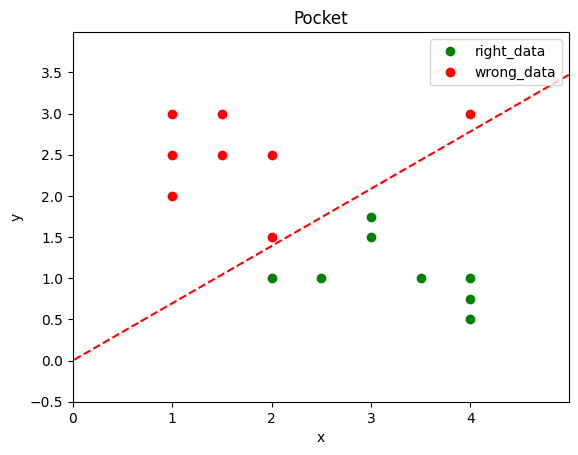

In [365]:
X = np.array([[4,0.75],[4,0.5],[2, 1], [3, 1.75],[3.5,1],[3,1.5],[4,1], [2.5,1],[4, 3], [1, 3],[1, 2.5],[2, 2.5],[1.5,3],[1.5,2.5],[2,1.5],[1,2]])
A_V = np.vsplit(X,2)
A_U = A_V[0]
A_V = A_V[1]
A_Y = np.hsplit(A_U,2)
AY0 = np.ravel(A_Y[0])
AY1 = np.ravel(A_Y[1])
A_N = np.hsplit(A_V,2)
AN0 = np.ravel(A_N[0])
AN1 = np.ravel(A_N[1])
plt.plot(AY0, AY1,'o',label='right_data',color='green')
plt.plot(AN0, AN1,'o',label='wrong_data',color='red')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
zz = w_pocket[1] * xx + w_pocket[2] * yy + b_pocket
print(zz)
plt.contour(xx, yy, zz, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.legend()
plt.show()

## 题2：PLA与Pocket算法的实际应用

(a).首先按照题目要求生成数据集X1与X2，分别作为+1样本与-1样本输入PLA算法与Pocket算法中.

In [366]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(30)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[-1.89865482e-01,  5.50221373e+00],
        [-5.02919272e+00,  1.39405598e+00],
        [-1.99915788e+00,  4.21375309e+00],
        [-6.39213006e-01,  6.43444929e+00],
        [-7.65799470e-01,  4.89655856e+00],
        [-6.30125917e+00, -6.40448106e-02],
        [-1.29829078e+00,  4.16308635e+00],
        [-7.90336760e+00,  1.61689037e+00],
        [-1.97950405e+00, -3.26107166e-01],
        [-4.75166575e+00, -1.40389210e+00],
        [-5.26552820e+00,  1.27711759e-01],
        [-5.16839969e+00, -7.70003457e-01],
        [-5.68922937e+00, -8.52756865e-01],
        [ 2.85401845e-01,  4.72408211e+00],
        [-5.07841870e-01,  5.14518798e+00],
        [-4.74696788e-01,  5.89586277e+00],
        [ 1.30696041e+00,  5.54404202e+00],
        [ 1.27923705e+00,  5.95474148e+00],
        [ 8.64459263e-01,  5.04755049e+00],
        [-5.90378286e+00, -3.12002333e-01],
        [-3.01306849e-02,  5.53179648e+00],
        [ 1.67999020e+00,  3.95640150e+00],
        [-3.73806016e+00, -1.338

在上面的代码中，···

(b) 下面分别用PLA和Pocket算法找出分类面，并画出分类面与数据集的图像。
- 首先是PLA算法在训练集上的表现，可以发现，PLA算法在训练集上的表现还是不错的，分类面与数据集的分布基本吻合。

In [367]:
start_time = time.perf_counter()
w_1,b_1 = PLA(X_train, y_train)
end_time = time.perf_counter()
print("PLA算法的运行时间:", end_time - start_time)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)

PLA算法的运行时间: 0.0032945000002655433
PLA算法的权重向量: [ 0.         -4.83932724 -4.10815774]
PLA算法的偏置项: 0.0


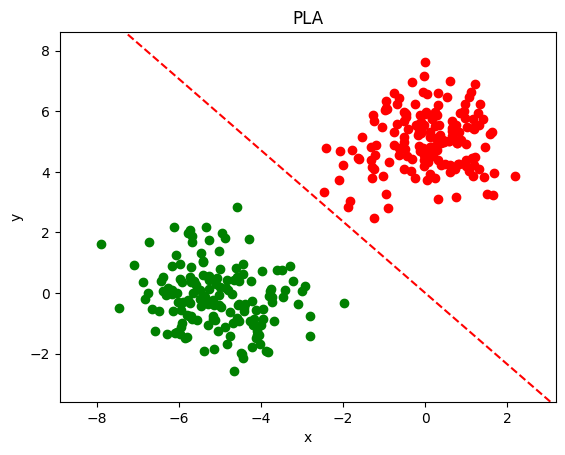

In [368]:
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')

plt.show()

PLA算法在测试集上的表现：

In [369]:
w_1test,b_1test = PLA(X_test, y_test)
print("PLA算法的权重向量:", w_1test)
print("PLA算法的偏置项:", b_1test)

PLA算法的权重向量: [ 0.         -4.46170128 -6.26332719]
PLA算法的偏置项: 0.0


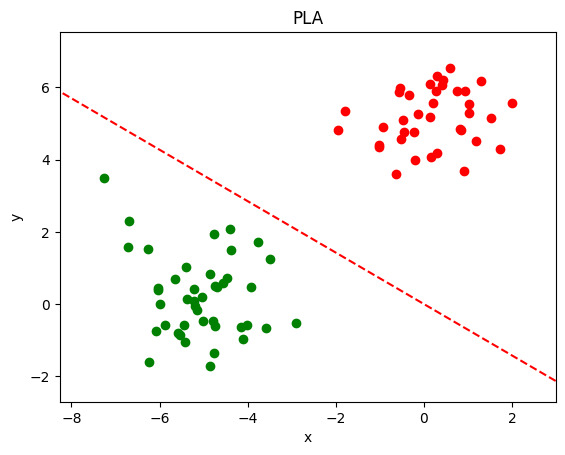

In [370]:
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz1 = w_1test[1] * xx1 + w_1test[2] * yy1 + b_1test
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()

即在测试集上的表现也较好，分类面与数据集的分布基本吻合。

- 对于Pocket算法，在训练集上的表现如下图所示：

In [371]:
start_time = time.perf_counter()
w_2,b_2,min_error2 = Pocket(X_train, y_train)
end_time = time.perf_counter()
print("Pocket算法的运行时间:", end_time - start_time)
print(min_error2)
print("PLA算法的权重向量:", w_2)
print("PLA算法的偏置项:", b_2)

Pocket算法的运行时间: 0.0029613000006065704
0
PLA算法的权重向量: [-1.         -3.95477211 -5.4163052 ]
PLA算法的偏置项: -1.0


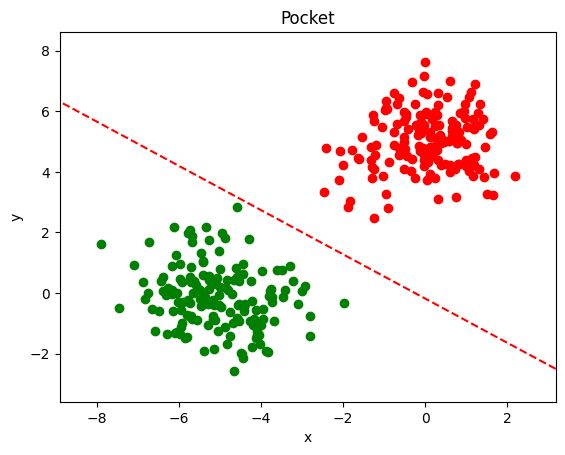

In [372]:
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz2 = w_2[1] * xx2 + w_2[2] * yy2 + b_2
plt.contour(xx2, yy2, zz2, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

在测试集上的表现：

In [373]:
w_2test,b_2test,min_error2test = Pocket(X_test, y_test)
print(min_error2test)
print("PLA算法的权重向量:", w_2test)
print("PLA算法的偏置项:", b_2test)

0
PLA算法的权重向量: [ 0.         -5.36330002 -4.60390886]
PLA算法的偏置项: 0.0


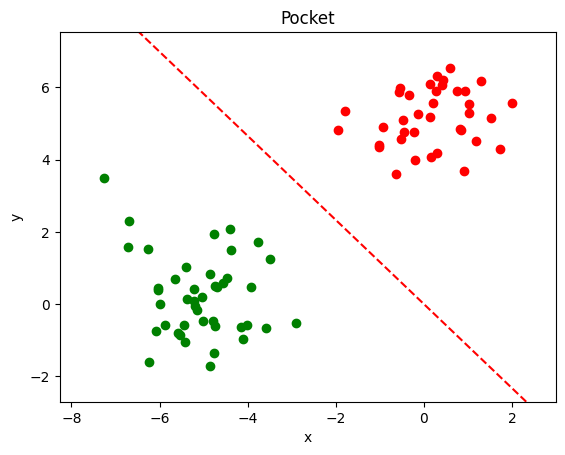

In [374]:
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz2 = w_2test[1] * xx2 + w_2test[2] * yy2 + b_2test
plt.contour(xx2, yy2, zz2, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

可以发现，Pocket算法在测试集上表现较为优秀，分类面与数据集的分布基本吻合。

统计发现，在本题数据情况下，PLA与Pocket算法在训练集上的表现相差不大，但在测试集上，Pocket算法的表现要优于PLA算法。两者分类准确率都是100%。参数设定为：max_times=1000, learning_rate=1

通过计时函数，可以发现，在输入相同数据样本的情况下(训练集)，PLA算法的运行时间: 0.0010300000003553578，Pocket算法的运行时间: 0.0016374999995605322，即Pocket算法的运行时间更长

## 题3：更换数据集再次测试PLA与Pocket算法的表现。

生成新的数据集如下：

In [375]:
import numpy as np
from sklearn.model_selection import train_test_split
#设置随机种子
np.random.seed(40)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([1,0])  #第一类样本的区间
interval_2 = np.array([0,1])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[ 3.09115733e-01,  2.19493882e+00],
        [ 1.07683154e+00, -4.35000775e-01],
        [-4.17422814e-01,  1.77786453e+00],
        [ 7.24176753e-01, -3.04181843e-01],
        [ 5.02372985e-02,  3.06424303e-01],
        [ 1.53189081e+00,  3.79344760e-01],
        [-7.62296958e-01, -9.87586714e-01],
        [ 2.07144790e+00,  4.15818012e-01],
        [-5.88090506e-01, -9.28010501e-01],
        [ 2.20930302e+00,  6.65395883e-01],
        [ 2.59195605e+00,  2.27021905e+00],
        [ 8.29948829e-01, -3.05342720e-01],
        [-3.37034504e-01,  2.09172171e-01],
        [-2.91438780e-01,  1.93652693e+00],
        [ 1.40455632e+00,  8.42505191e-01],
        [ 1.77652929e-01,  2.14114278e+00],
        [ 1.55447124e+00,  6.85705109e-01],
        [-1.36352478e+00,  1.81586677e-01],
        [-5.19316507e-01,  4.60924883e-01],
        [-1.11994550e+00,  1.90815890e+00],
        [ 1.39647824e+00,  6.74261963e-01],
        [-9.54923574e-02,  1.60121982e+00],
        [ 7.45941908e-01, -8.110

- 首先是PLA算法在训练集上的表现：

PLA算法的权重向量: [ 1.          3.28278096 -3.13918725]
PLA算法的偏置项: 1.0


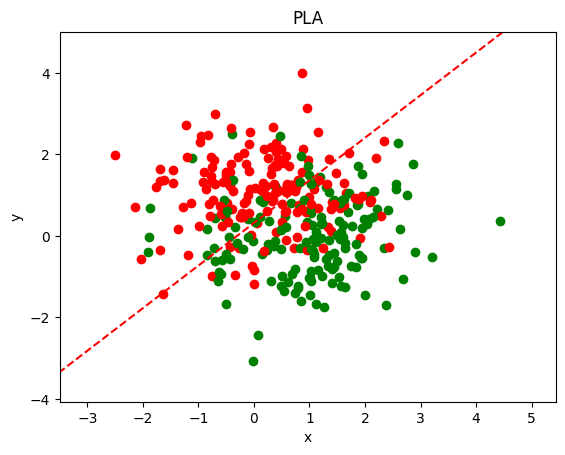

In [376]:
w_1,b_1 = PLA(X_train, y_train)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()


本次样本是线性不可分的，故我们用下面代码统计准确率

In [377]:
error = 0
X_ones = np.ones(X_train.shape[0])
X_train = np.insert(X_train, 0, values=X_ones, axis=1)
for i in range(X_train.shape[0]):
    if y_train[i] * (np.dot(X_train[i], w_1)+b_1) <= 0:
        error += 1
print(error)
print(X_train.shape)

83
(320, 3)


即PLA算法在线性不可分样本上的准确率为74.06%

在测试集上：

PLA算法的权重向量: [-1.          1.86138749 -2.39015813]
PLA算法的偏置项: -1.0


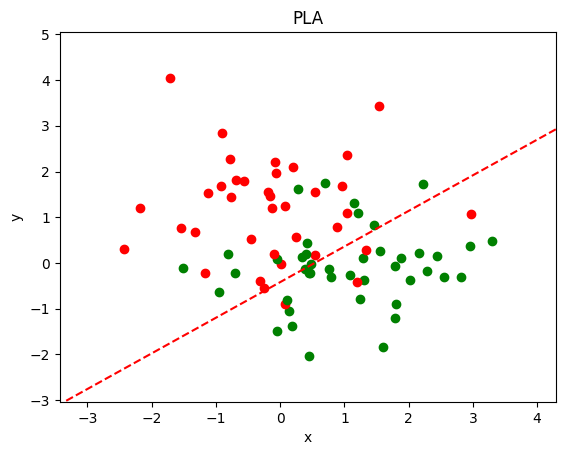

In [378]:
w_1,b_1 = PLA(X_test, y_test)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()

本次样本是线性不可分的，故我们用下面代码统计准确率

In [379]:
error = 0
X_ones = np.ones(X_test.shape[0])
X_test = np.insert(X_test, 0, values=X_ones, axis=1)
for i in range(X_test.shape[0]):
    if y_test[i] * (np.dot(X_test[i], w_1)+b_1) <= 0:
        error += 1
print(error)

22


故正确率为72.5%

同样对Pocket算法进行测试，首先是在训练集上的表现：

PLA算法的权重向量: [ 1.          2.20812319 -4.17749826]
PLA算法的偏置项: 1.0


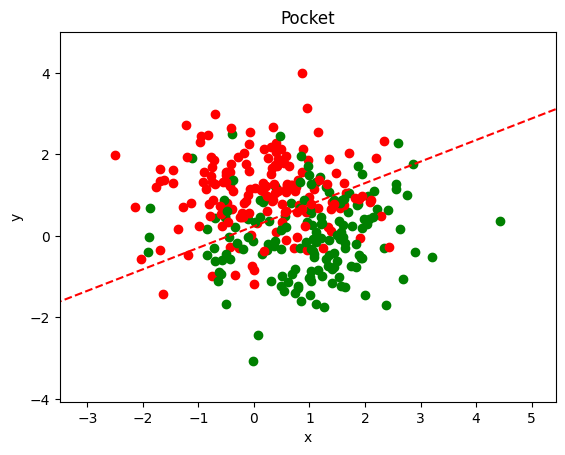

In [380]:
X_train = np.delete(X_train, 0, axis=1)
w_pocket,b_pocket,min_errorpo = Pocket(X_train, y_train)
print("PLA算法的权重向量:", w_pocket)
print("PLA算法的偏置项:", b_pocket)
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz1 = w_pocket[1] * xx1 + w_pocket[2] * yy1 + b_pocket
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

In [381]:
error = 0
X_ones = np.ones(X_train.shape[0])
X_train = np.insert(X_train, 0, values=X_ones, axis=1)
for i in range(X_train.shape[0]):
    if y_train[i] * (np.dot(X_train[i], w_pocket)+b_pocket) <= 0:
        error += 1
print(error)
print(X_train.shape)

73
(320, 3)


即准确率为76.56%

在测试集上：


PLA算法的权重向量: [ 1.          1.25074056 -4.16182418]
PLA算法的偏置项: 1.0


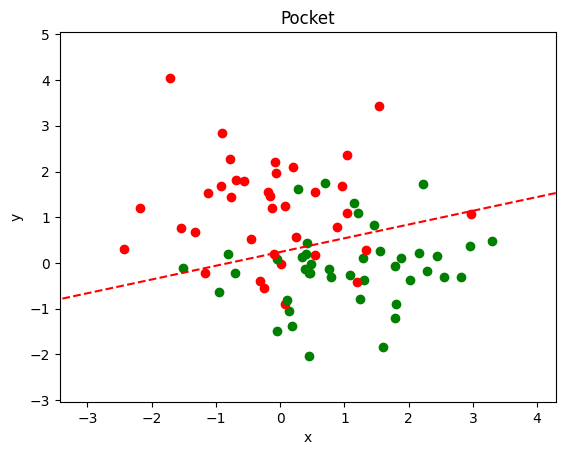

In [382]:
X_test = np.delete(X_test, 0, axis=1)
w_pocket,b_pocket,min_errorpo = Pocket(X_test, y_test)
print("PLA算法的权重向量:", w_pocket)
print("PLA算法的偏置项:", b_pocket)
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz1 = w_pocket[1] * xx1 + w_pocket[2] * yy1 + b_pocket
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

统计准确率如下所示：

In [383]:
error = 0
X_ones = np.ones(X_test.shape[0])
X_test = np.insert(X_test, 0, values=X_ones, axis=1)
for i in range(X_test.shape[0]):
    if y_test[i] * (np.dot(X_test[i], w_pocket)+b_pocket) <= 0:
        error += 1
print(error)
print(X_test.shape)

15
(80, 3)


准确率为81.25%

因此在此种样本输入的情形下，Pocket算法的表现要优于PLA算法。即处理非线性可分样本时，Pocket算法的表现要优于PLA算法。此时的参数为：max_times=1000, learning_rate=1

### 题4：改变样本分布和超参数，探究规律

- 首先考虑改变样本数量：
  - 取大于400的样本数量，此处取10000*2=20000，计算准确率如下所示：

In [384]:
import numpy as np
from sklearn.model_selection import train_test_split
#设置随机种子
np.random.seed(40)
#生成200个服从正态分布的随机数
samples = 10000                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(16000, 2) (16000,)
(4000, 2) (4000,)


(array([[-0.08357835,  6.1685671 ],
        [-4.49049899, -0.09627672],
        [ 1.96948708,  6.8203552 ],
        ...,
        [-0.17999621,  3.3661857 ],
        [-5.46744572,  1.75206338],
        [-5.31003474, -0.89108307]]),
 array([-1.,  1., -1., ..., -1.,  1.,  1.]))

在训练集上：

PLA算法的权重向量: [ 10.         -30.75613846 -36.85421613]
PLA算法的偏置项: 10.0


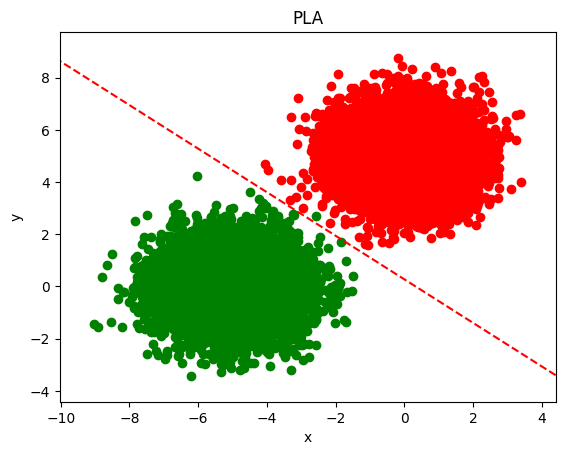

In [385]:
w_1,b_1 = PLA(X_train, y_train)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()


In [386]:
error = 0
X_ones = np.ones(X_train.shape[0])
X_train = np.insert(X_train, 0, values=X_ones, axis=1)
for i in range(X_train.shape[0]):
    if y_train[i] * (np.dot(X_train[i], w_1)+b_1) <= 0:
        error += 1
print(error)
print(X_train.shape)

0
(16000, 3)


此时PLA算法的分类准确率仍为100%，即PLA算法在训练集上的表现受样本数量的影响较小。

在训练集上：

PLA算法的权重向量: [ 0.         -8.61301906 -8.06540334]
PLA算法的偏置项: 0.0


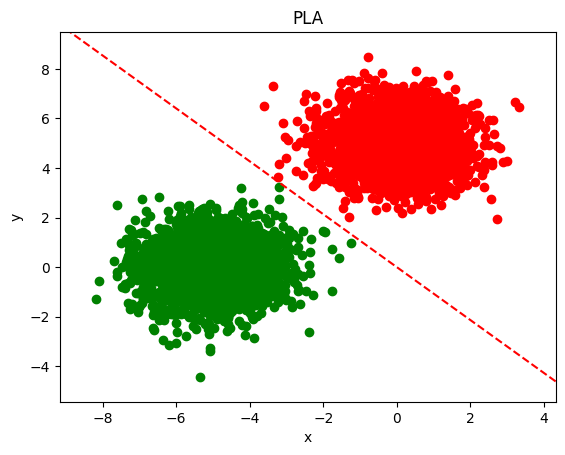

In [387]:
w_1,b_1 = PLA(X_test, y_test)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()

In [388]:
error = 0
X_ones = np.ones(X_test.shape[0])
X_test = np.insert(X_test, 0, values=X_ones, axis=1)
for i in range(X_test.shape[0]):
    if y_test[i] * (np.dot(X_test[i], w_1)+b_1) <= 0:
        error += 1
print(error)

0


即此时的准确率为100%，即PLA算法在测试集上的表现受样本数量的影响也较小。

对于Pocket算法，我们同样进行测试，首先是在训练集上的表现：

PLA算法的权重向量: [  8.         -24.76872888 -29.57600355]
PLA算法的偏置项: 8.0


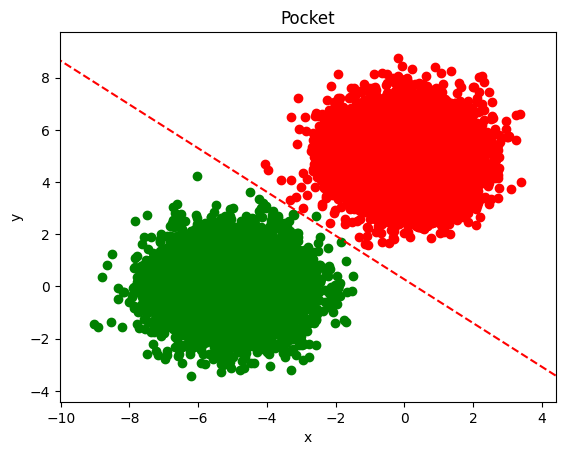

In [389]:
X_train = np.delete(X_train, 0, axis=1)
w_pocket,b_pocket,min_errorpo = Pocket(X_train, y_train)
print("PLA算法的权重向量:", w_pocket)
print("PLA算法的偏置项:", b_pocket)
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz1 = w_pocket[1] * xx1 + w_pocket[2] * yy1 + b_pocket
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

计算错分数量：

In [390]:
error = 0
X_ones = np.ones(X_train.shape[0])
X_train = np.insert(X_train, 0, values=X_ones, axis=1)
for i in range(X_train.shape[0]):
    if y_train[i] * (np.dot(X_train[i], w_pocket)+b_pocket) <= 0:
        error += 1
print(error)
print(X_train.shape)

0
(16000, 3)


再观测在测试集上的表现：

PLA算法的权重向量: [ 1.         -9.80971956 -9.52656815]
PLA算法的偏置项: 1.0


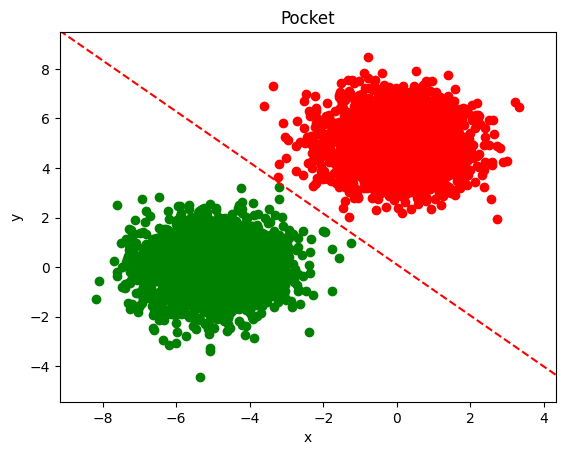

In [391]:
X_test = np.delete(X_test, 0, axis=1)
w_pocket,b_pocket,min_errorpo = Pocket(X_test, y_test)
print("PLA算法的权重向量:", w_pocket)
print("PLA算法的偏置项:", b_pocket)
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz1 = w_pocket[1] * xx1 + w_pocket[2] * yy1 + b_pocket
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

计算错分数量：

In [392]:
error = 0
X_ones = np.ones(X_test.shape[0])
X_test = np.insert(X_test, 0, values=X_ones, axis=1)
for i in range(X_test.shape[0]):
    if y_test[i] * (np.dot(X_test[i], w_pocket)+b_pocket) <= 0:
        error += 1
print(error)
print(X_test.shape)

0
(4000, 3)


即准确率也是100%，说明Pocket算法在训练集和测试集上的表现受样本数量的影响都较小。

对于取小于400的样本数据，也可以发现两者均可以达到100%的准确率，故不再赘述。且Pocket算法取出的分类面更好。

- 考虑改变超参数：
  - 首先是改变学习率，取learning_rate=0.1，计算准确率如下所示：

In [393]:
# 定义PLA算法函数
def PLA_another(X, y,max_iter=1000,learning_rate = 0.1):
    # 对输入样本进行增广，增加一列1作为每个输入样本的X的x0
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, values=X_1, axis=1)
    # 初始化权重向量为[0,0,0]
    w = np.zeros(X.shape[1])
    b = 0
    while max_iter > 0:
        # 初始化分类错误标志变量
        error = False
        # 遍历所有样本点
        for i in range(X.shape[0]):
            # 如果样本点被错误分类
            if y[i] * (np.dot(X[i], w)+b) <= 0:
                # 更新权重向量
                w = w + y[i] * X[i] * learning_rate
                b = b + y[i] * learning_rate
                error = True
        # 如果所有样本点都被正确分类，则停止迭代
        if not error:
            break
        max_iter -= 1
    return w,b

In [394]:
import numpy as np

# 定义Pocket算法函数
def Pocket_another(X, y,max_times=1000,learning_rate = 0.1):
    # 对输入样本进行增广，增加一列1作为每个输入样本的X的x0
    X_1 = np.ones(X.shape[0])
    X = np.insert(X, 0, values=X_1, axis=1)
    # 初始化权重向量为[0,0,0]
    w = np.zeros(X.shape[1])  # 初始化权重向量
    w_pocket = np.copy(w)     # 初始化Pocket中的权重向量,直接选择w_pocket = (0,0,0)
    b = 0                     # 初始化偏置项
    b_pocket = 0             # 初始化Pocket中的偏置项
    min_error = 0             # 初始化最小错误数，即初始Pocket中的错误数
    for i in range(X.shape[0]):
        if y[i] * (np.dot(X[i], w_pocket) + b_pocket) <= 0:
            min_error += 1
    times = 0
    while times < max_times and min_error > 0:
        error = 0  # 统计当前迭代的分类错误数
        # 随机打乱样本顺序
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in indices:
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                w = w + y[i] * X[i] * learning_rate
                b = b + y[i] * learning_rate
        for i in range(X.shape[0]):
            if y[i] * (np.dot(X[i], w) + b) <= 0:
                error += 1

        # 如果当前迭代的错误数更少，则更新Pocket中的权重和偏置项
        if error < min_error:
            min_error = error
            w_pocket = np.copy(w)
            b_pocket = b
            times += 1
        else:
            times += 1
            continue
    #返回Pocket中的权重、偏置项和最小错误数
    return w_pocket, b_pocket, min_error 


In [395]:
import numpy as np
from sklearn.model_selection import train_test_split
#设置随机种子
np.random.seed(30)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


(array([[-1.89865482e-01,  5.50221373e+00],
        [-5.02919272e+00,  1.39405598e+00],
        [-1.99915788e+00,  4.21375309e+00],
        [-6.39213006e-01,  6.43444929e+00],
        [-7.65799470e-01,  4.89655856e+00],
        [-6.30125917e+00, -6.40448106e-02],
        [-1.29829078e+00,  4.16308635e+00],
        [-7.90336760e+00,  1.61689037e+00],
        [-1.97950405e+00, -3.26107166e-01],
        [-4.75166575e+00, -1.40389210e+00],
        [-5.26552820e+00,  1.27711759e-01],
        [-5.16839969e+00, -7.70003457e-01],
        [-5.68922937e+00, -8.52756865e-01],
        [ 2.85401845e-01,  4.72408211e+00],
        [-5.07841870e-01,  5.14518798e+00],
        [-4.74696788e-01,  5.89586277e+00],
        [ 1.30696041e+00,  5.54404202e+00],
        [ 1.27923705e+00,  5.95474148e+00],
        [ 8.64459263e-01,  5.04755049e+00],
        [-5.90378286e+00, -3.12002333e-01],
        [-3.01306849e-02,  5.53179648e+00],
        [ 1.67999020e+00,  3.95640150e+00],
        [-3.73806016e+00, -1.338

In [396]:
w_1,b_1 = PLA(X_train, y_train)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)

PLA算法的权重向量: [ 0.         -4.83932724 -4.10815774]
PLA算法的偏置项: 0.0


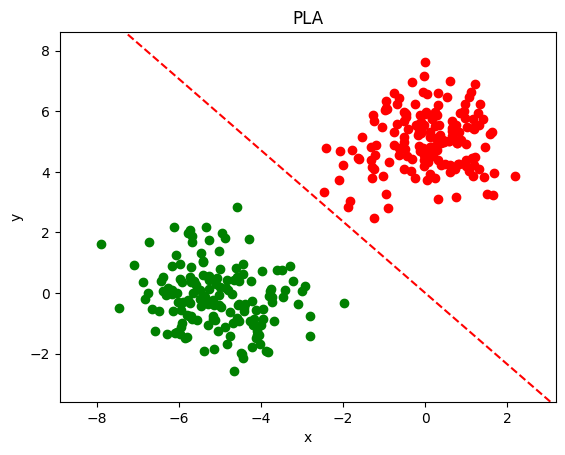

In [397]:
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()

In [398]:
w_1,b_1 = PLA(X_test, y_test)
print("PLA算法的权重向量:", w_1)
print("PLA算法的偏置项:", b_1)

PLA算法的权重向量: [ 0.         -4.46170128 -6.26332719]
PLA算法的偏置项: 0.0


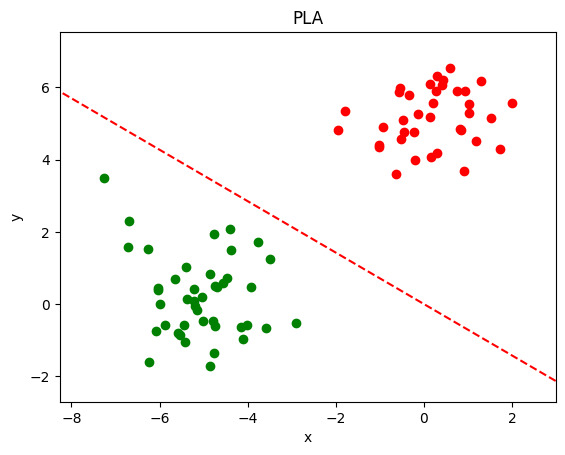

In [399]:
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz1 = w_1[1] * xx1 + w_1[2] * yy1 + b_1
plt.contour(xx1, yy1, zz1, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PLA')
plt.show()

对Pocket算法也进行同样的测试：在训练集上：

In [400]:
w_2,b_2,min_error2 = Pocket(X_train, y_train)
print(min_error2)
print("PLA算法的权重向量:", w_2)
print("PLA算法的偏置项:", b_2)

0
PLA算法的权重向量: [-1.         -3.95477211 -5.4163052 ]
PLA算法的偏置项: -1.0


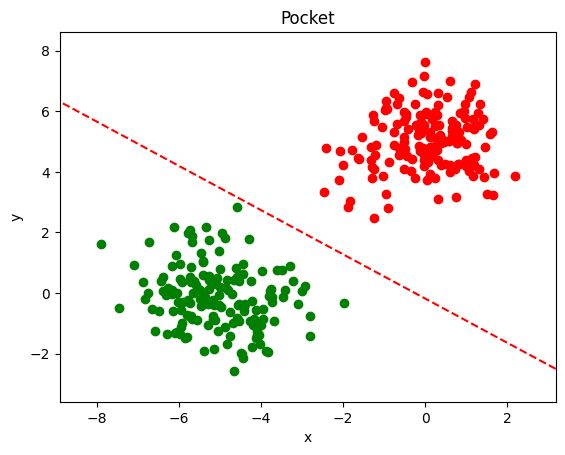

In [401]:
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
x_train_min, x_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_train_min, x_train_max, 0.01), np.arange(y_train_min, y_train_max, 0.01))
zz2 = w_2[1] * xx2 + w_2[2] * yy2 + b_2
plt.contour(xx2, yy2, zz2, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

In [402]:
w_2test,b_2test,min_error2test = Pocket(X_test, y_test)
print(min_error2test)
print("PLA算法的权重向量:", w_2test)
print("PLA算法的偏置项:", b_2test)

0
PLA算法的权重向量: [ 0.         -5.36330002 -4.60390886]
PLA算法的偏置项: 0.0


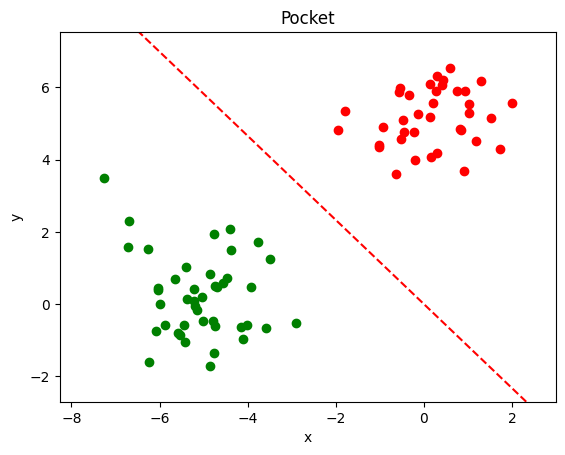

In [403]:
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
x_test_min, x_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_test_min, x_test_max, 0.01), np.arange(y_test_min, y_test_max, 0.01))
zz2 = w_2test[1] * xx2 + w_2test[2] * yy2 + b_2test
plt.contour(xx2, yy2, zz2, levels=[0], colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pocket')
plt.show()

可以发现learning_rate=0.1时，对分类结果影响不大，准确率仍为100%。取learning_rate=0.001时，仍然可以达到100%的准确率，故不再赘述。

另外还可以考虑改变样本分布，即改变样本的均值与方差，样本的线性不可分程度越大时，Pocket算法的表现越好，因为它不会在每个错误分类的样本上进行权重更新，可以在一定程度上避免过拟合的发生。PLA算法对于线性不可分数据可能会出现不收敛的情况。线性可分程度较大时对两者几乎都没有什么影响。

考虑改变最大迭代次数时，迭代次数越大，两者的表现都会越好，但是当迭代次数达到一定程度时，两者的表现都不会有太大的变。